<a href="https://colab.research.google.com/github/ArtoriasYANG/CHL5230H-Datathon-3/blob/main/Datathon3_Predicting_diabetes_(Part_I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

df = pd.read_excel(io.BytesIO(uploaded['Diabetes_cleaned.xlsx']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

Saving Diabetes_cleaned.xlsx to Diabetes_cleaned.xlsx


Sex  Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  FBS  FBS>DM  \
0  Female           65  126.0  31.000000  1.66  1.11  5.4  2.28  5.8       1   
1  Female           62  135.0  25.846483  2.49  1.37  5.8  1.37  5.4       1   
2    Male           63  133.0  30.900000  1.65   NaN  6.1  0.76  5.6       1   
3  Female           51  136.0  56.710775  2.80  1.94  6.0  0.99  6.0       1   
4  Female           40  123.0  33.067867  2.48  1.17  5.8  1.04  5.2       1   

   ...  OA  COPD           Hypertension_Medications  Corticosteroids  \
0  ...   0     0                                NaN              NaN   
1  ...   0     0                         FUROSEMIDE              NaN   
2  ...   0     1   METOPROLOL / RAMIPRIL / LOSARTAN              NaN   
3  ...   0     0                                NaN              NaN   
4  ...   0     0                                NaN              NaN   

   leastO(A1c_Date)  leastO(DM_OnsetDate) leastO(FBS_Date) LeastOfAll  \
0               NaN                   NaN              NaN        NaN   
1               NaN                   NaN              NaN        NaN   
2               NaN                   NaN              NaN        NaN   
3               NaN                   NaN              NaN        NaN   
4               NaN                   NaN              NaN        NaN   

   A1C_BEF_DM  FBS_BEF_DM  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 24 columns]

In [2]:
#import libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
#columns preprocessing
df['Hypertension_Medications'].fillna(0, inplace=True)
df['Using_Hypertension_Med'] = df['Hypertension_Medications'].apply(lambda x: 1 if x != 0 else 0)
df['Corticosteroids'].fillna(0, inplace=True)
df['Using_Corticosteroids'] = df['Corticosteroids'].apply(lambda x: 1 if x != 0 else 0)
df.drop(columns=['Hypertension_Medications'], inplace=True)
df.drop(columns=['Corticosteroids'], inplace=True)

In [4]:
print(df.isnull().sum())

Sex                          0
Age_at_Exam                  0
sBP                          4
BMI                          0
LDL                         61
HDL                         72
A1c                          0
TG                          53
FBS                          0
FBS>DM                       0
Total_Cholesterol          207
Diabetes                     0
Depression                   0
HTN                          0
OA                           0
COPD                         0
leastO(A1c_Date)          4594
leastO(DM_OnsetDate)      4863
leastO(FBS_Date)          4589
LeastOfAll                4863
A1C_BEF_DM                4863
FBS_BEF_DM                4863
Using_Hypertension_Med       0
Using_Corticosteroids        0
dtype: int64


In [5]:
#fill na with median values
df['sBP'].fillna(df['sBP'].median(), inplace=True)
df['LDL'].fillna(df['LDL'].median(), inplace=True)
df['HDL'].fillna(df['HDL'].median(), inplace=True)
df['TG'].fillna(df['TG'].median(), inplace=True)
df['Total_Cholesterol'].fillna(df['Total_Cholesterol'].median(), inplace=True)

In [6]:
df.drop(columns=['A1C_BEF_DM'], inplace=True)
df.drop(columns=['FBS_BEF_DM'], inplace=True)
df.drop(columns=['leastO(A1c_Date)'], inplace=True)
df.drop(columns=['leastO(DM_OnsetDate)'], inplace=True)
df.drop(columns=['leastO(FBS_Date)'], inplace=True)
df.drop(columns=['LeastOfAll'], inplace=True)

In [7]:
#encoding sex to 0 and 1
sex_mapping = {'Female': 0, 'Male': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [8]:
df['TC/HDL'] = df['Total_Cholesterol']/df['HDL']
df.head()

Sex  Age_at_Exam    sBP        BMI   LDL   HDL  A1c    TG  FBS  FBS>DM  \
0    0           65  126.0  31.000000  1.66  1.11  5.4  2.28  5.8       1   
1    0           62  135.0  25.846483  2.49  1.37  5.8  1.37  5.4       1   
2    1           63  133.0  30.900000  1.65  1.25  6.1  0.76  5.6       1   
3    0           51  136.0  56.710775  2.80  1.94  6.0  0.99  6.0       1   
4    0           40  123.0  33.067867  2.48  1.17  5.8  1.04  5.2       1   

   Total_Cholesterol  Diabetes  Depression  HTN  OA  COPD  \
0               3.81         0           0    0   0     0   
1               4.48         0           0    1   0     0   
2               4.45         0           0    1   0     1   
3               5.19         0           0    0   0     0   
4               4.12         0           1    0   0     0   

   Using_Hypertension_Med  Using_Corticosteroids    TC/HDL  
0                       0                      0  3.432432  
1                       1                      0  3.270073  
2                       1                      0  3.560000  
3                       0                      0  2.675258  
4                       0                      0  3.521368

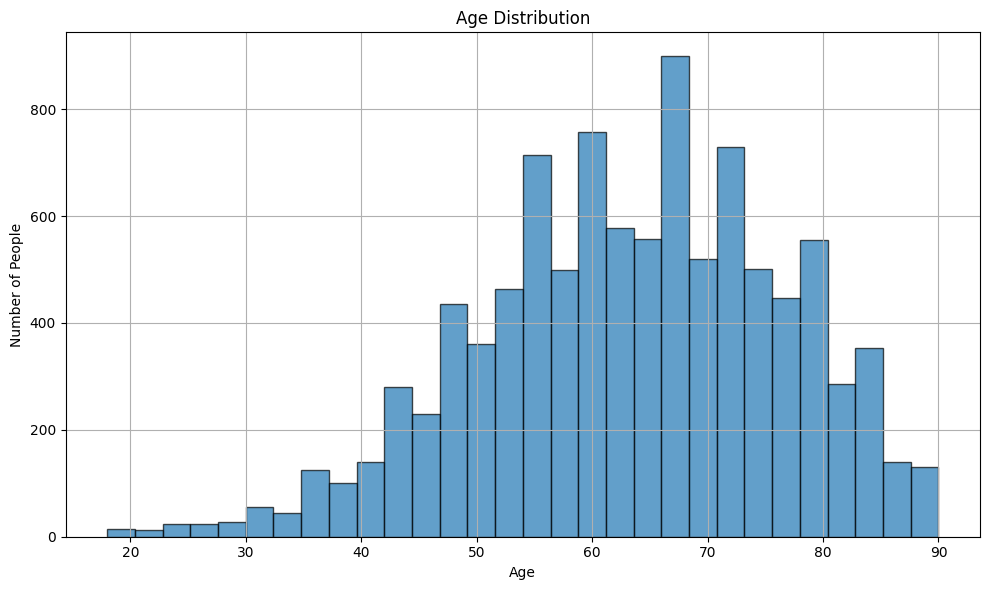

In [9]:
if 'Age_at_Exam' in df.columns:
    # Plotting the age distribution
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.hist(df['Age_at_Exam'], bins=30, edgecolor='black', alpha=0.7)

    # Title and labels
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Number of People')

    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("'age' column not found in the dataset")

In [10]:
# Function to create bar plots for categorical variables
def create_barplot(dataset, cat_var):
  # create a new dataframe to store counts of observations in each group
  cat_counts = dataset.groupby(cat_var).size().reset_index(name='Count')

# plot data
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.barplot(x=cat_counts[cat_var],
            y=cat_counts['Count'],
            ax=ax).set(title=f'Observation Count among {cat_var}')

  ax.bar_label(ax.containers[0], label_type='edge')
  ax.tick_params(axis='x', rotation=45)

  ax.margins(y=0.1)

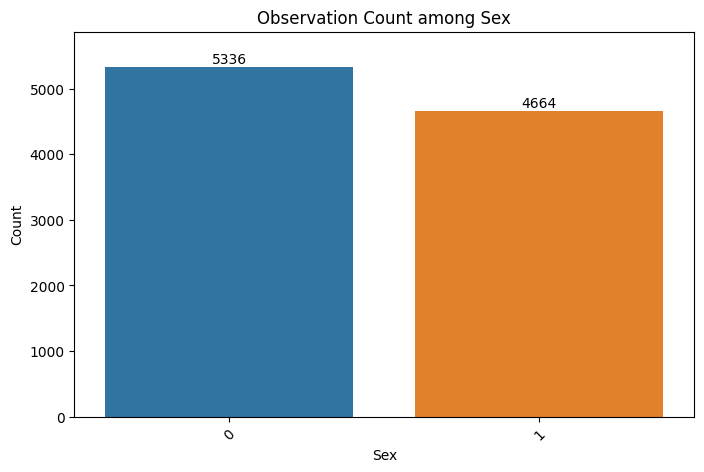

In [11]:
# Bar plots for all categorical variables
create_barplot(df, 'Sex')

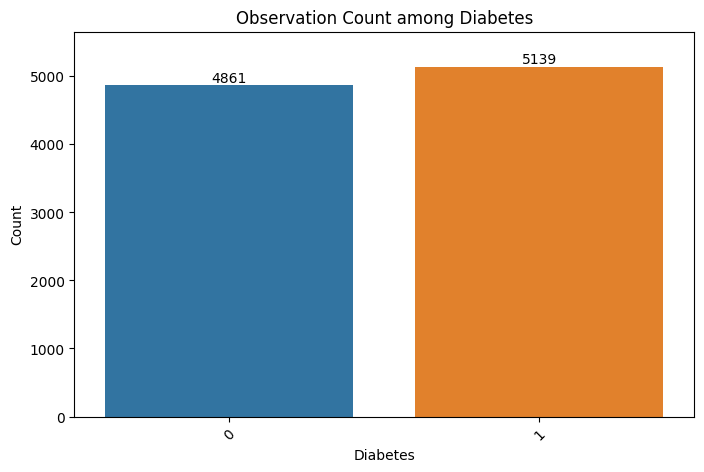

In [12]:

create_barplot(df, 'Diabetes')

In [13]:
description = df.describe()
description = description.drop('count')
description = description.drop('Diabetes', axis=1)

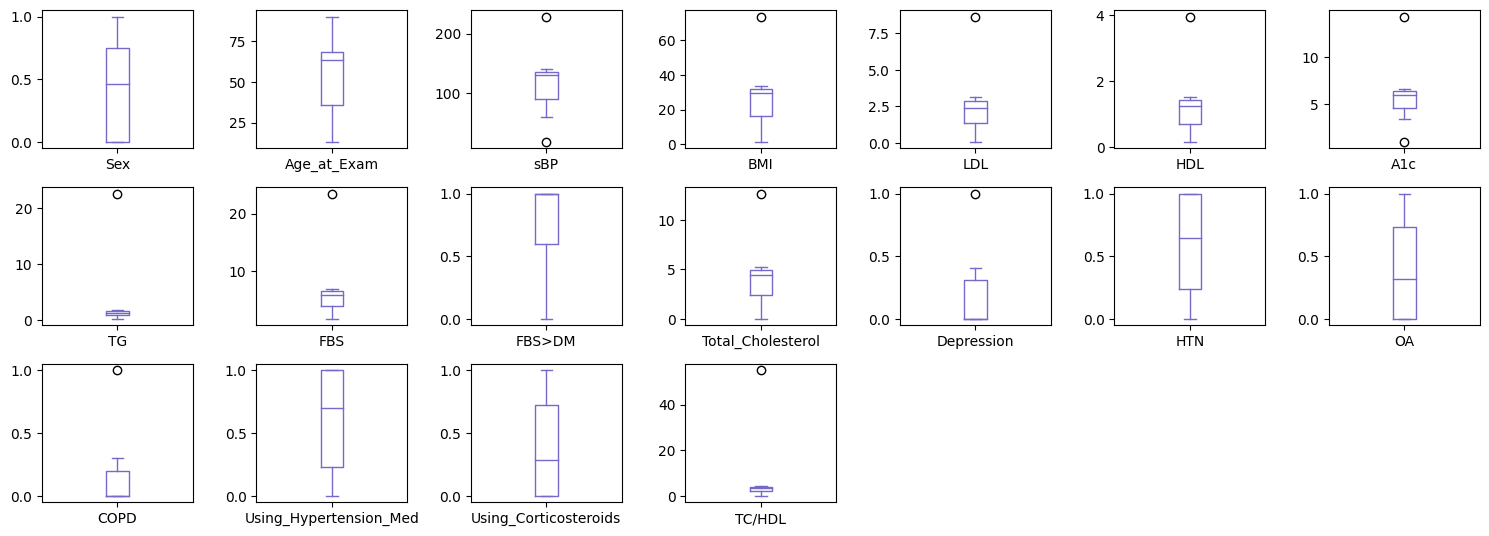

In [ ]:

description.plot(kind='box', subplots=True, layout=(
    4, 7), figsize=(15, 7), color='#7569c9')
plt.tight_layout()
plt.show()

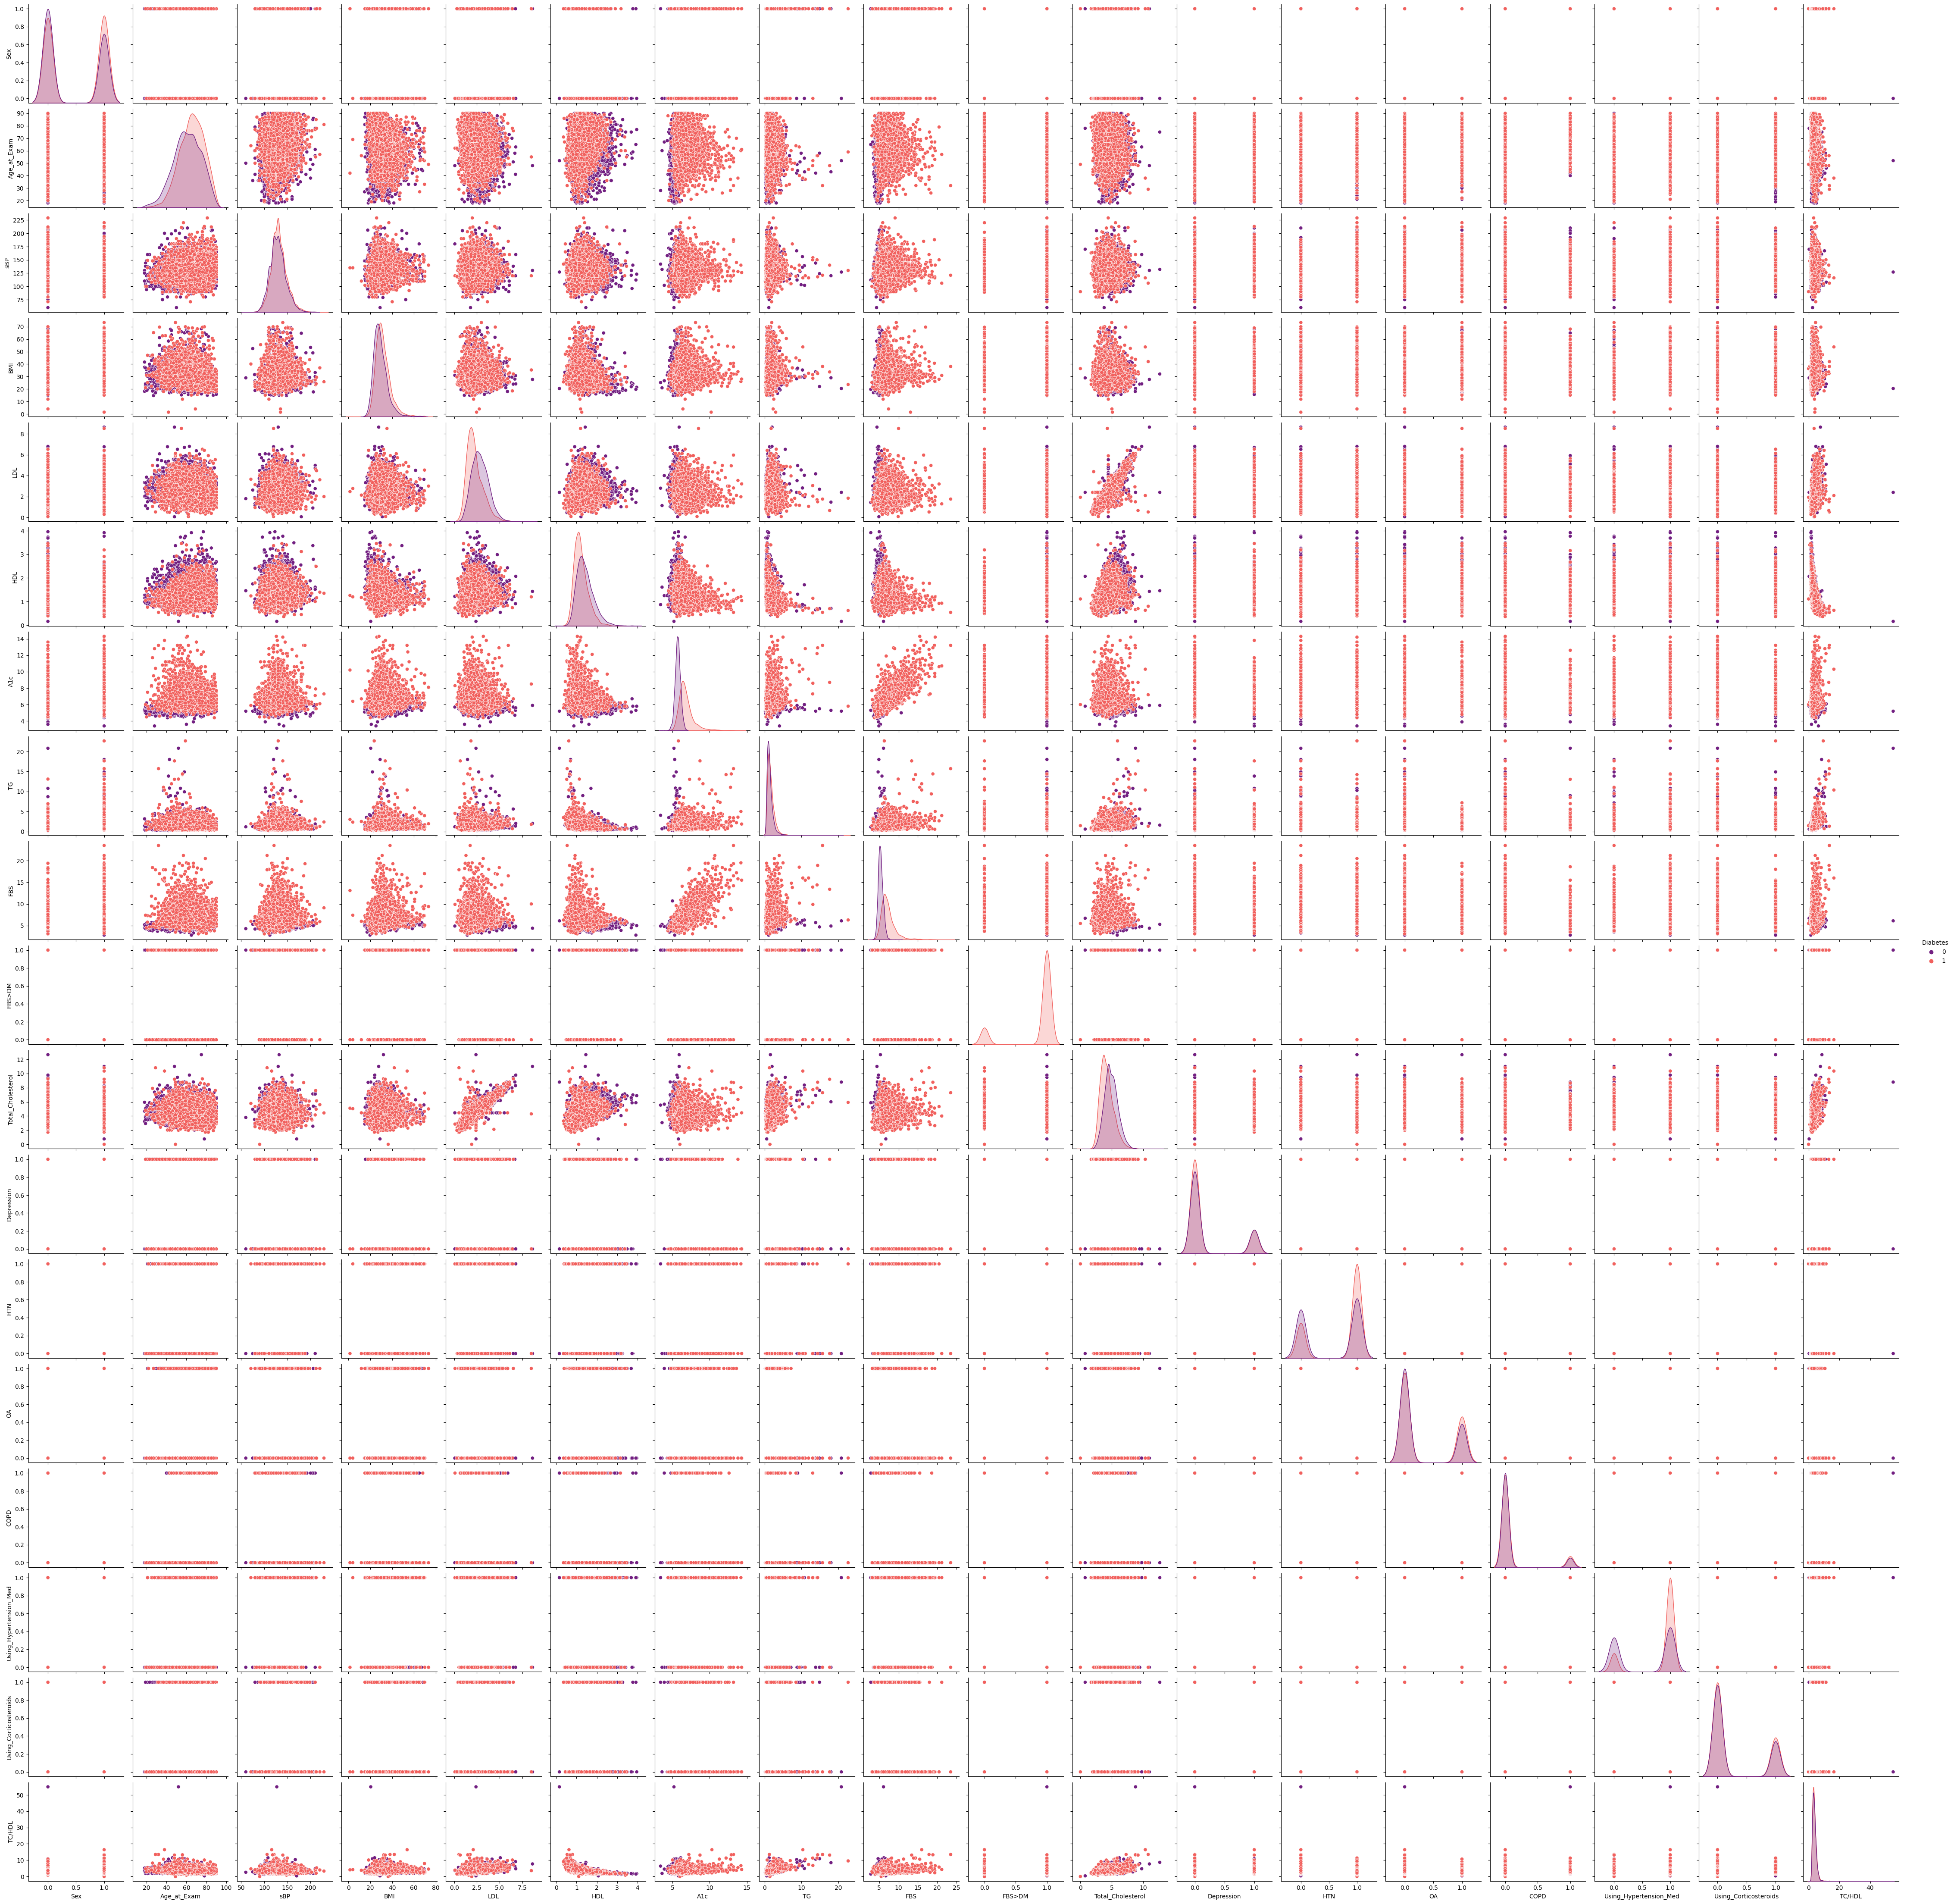

In [14]:
#might take some time
sns.pairplot(df, hue='Diabetes', palette="magma")
plt.show()

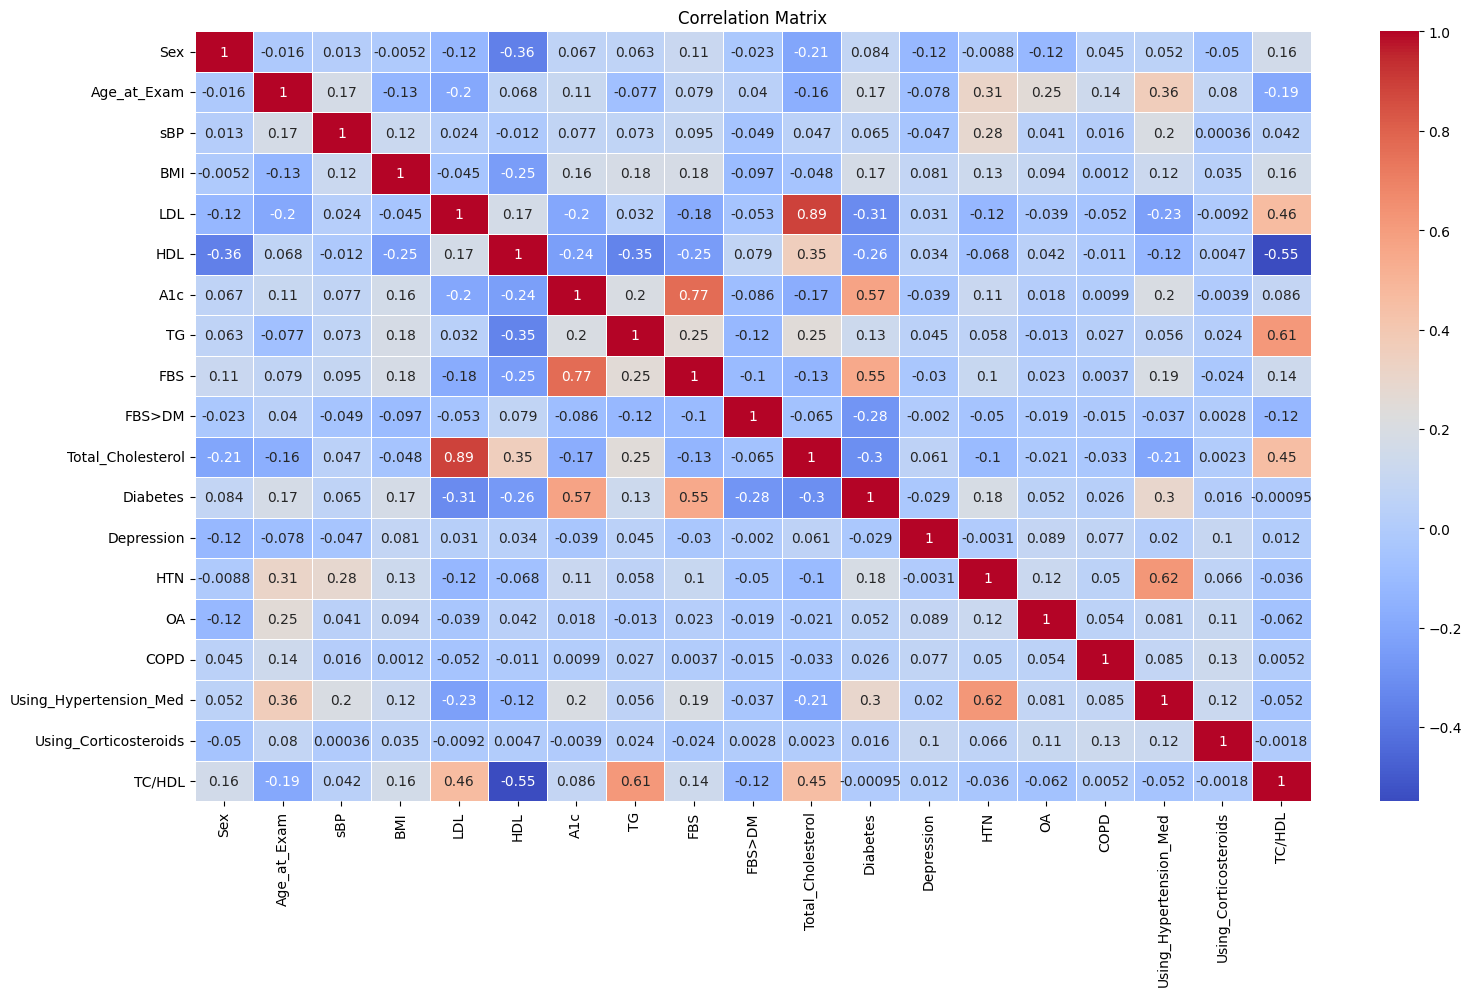

In [15]:
correlations = df.corr()
# Plotting the correlations using a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Remove high correlated variables:** 'Total_Cholesterol','leastO(A1c_Date', 'leastO(DM_OnsetDate)', 'leastO(FBS_Date)', 'LeastOfAll', 'Diabetes', 'A1c','Using_Hypertension_Med'

In [16]:
#Only keep one from A1c and FBS
X = df.drop(['Total_Cholesterol', 'Diabetes'], axis=1)
y = df['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform logistic regression with l1 penalty
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', class_weight = 'balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [17]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[892  87]
 [149 872]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       979
           1       0.91      0.85      0.88      1021

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



Text(0.5, 427.9555555555555, 'Predicted label')

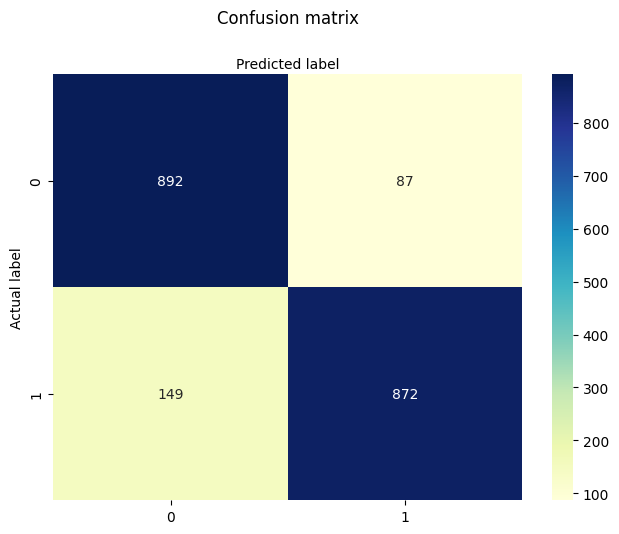

In [18]:
# Confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmapm
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

         Current function value: 0.276393
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.6010
Time:                        00:58:25   Log-Likelihood:                -2763.9
converged:                      False   LL-Null:                       -6927.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6635    991.582      0.001      0.999   -1942.802    1944.129
Sex                       -0.

[[873 106]
 [203 818]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       979
           1       0.89      0.80      0.84      1021

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



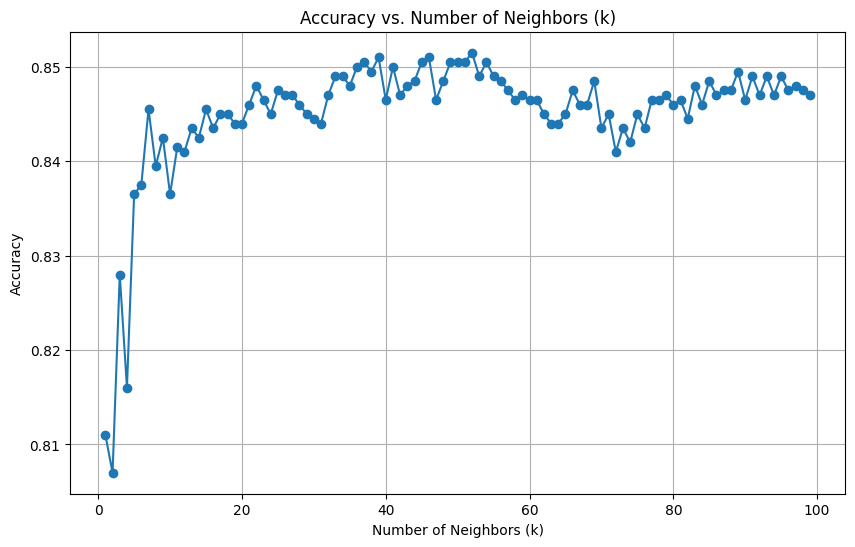

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
X = df.drop(['Total_Cholesterol', 'Diabetes'], axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [22]:
from scipy.stats import levene
variables = df[['Sex','Age_at_Exam','sBP','BMI','LDL','HDL','TG','FBS','FBS>DM','Depression','HTN','OA','COPD','Using_Corticosteroids','TC/HDL']]

# Check for equal covariance using Levene's test
results = {}

for var in variables:
    group0 = df[df['Diabetes'] == 0][var]
    group1 = df[df['Diabetes'] == 1][var]

    stat, p = levene(group0, group1)
    results[var] = (stat, p)

# Print the results
for var, (stat, p) in results.items():
    print(f"Variable: {var}")
    print(f"Statistic: {stat:.5f}")
    print(f"P-value: {p:.5f}")
    if p < 0.05:
        print(f"The variances for {var} seem different between the two groups.")
    else:
        print(f"The variances for {var} seem to be equal between the two groups.")
    print("-" * 40)

Variable: Sex
Statistic: 48.85700
P-value: 0.00000
The variances for Sex seem different between the two groups.
----------------------------------------
Variable: Age_at_Exam
Statistic: 76.83873
P-value: 0.00000
The variances for Age_at_Exam seem different between the two groups.
----------------------------------------
Variable: sBP
Statistic: 6.44568
P-value: 0.01114
The variances for sBP seem different between the two groups.
----------------------------------------
Variable: BMI
Statistic: 12.70988
P-value: 0.00037
The variances for BMI seem different between the two groups.
----------------------------------------
Variable: LDL
Statistic: 24.18777
P-value: 0.00000
The variances for LDL seem different between the two groups.
----------------------------------------
Variable: HDL
Statistic: 145.19975
P-value: 0.00000
The variances for HDL seem different between the two groups.
----------------------------------------
Variable: TG
Statistic: 48.41075
P-value: 0.00000
The variances fo

##Linear Discriminant Analysis (LDA) on Training Data##


In [23]:
# Splitting the original dataset into training, validation, and test sets

# Taking 70% of the data for training
train_df = df.sample(frac = 0.7)

# Removing the training data from the original dataset to get the combined validation and test data
test_df = df.drop(train_df.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_df = test_df.sample(frac = 0.5)
test_df = test_df.drop(valid_df.index)

In [24]:
def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


In [27]:
target_column = 'Diabetes'
numerical_columns =['Sex','Age_at_Exam','sBP','BMI','LDL','HDL','TG','FBS','FBS>DM','Depression','HTN','OA','COPD','Using_Corticosteroids','TC/HDL']

AUC :  0.8282022211199525
Accuracy :  0.827
Confusion Matrix:
[[2916  463]
 [ 748 2873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      3379
           1       0.86      0.79      0.83      3621

    accuracy                           0.83      7000
   macro avg       0.83      0.83      0.83      7000
weighted avg       0.83      0.83      0.83      7000



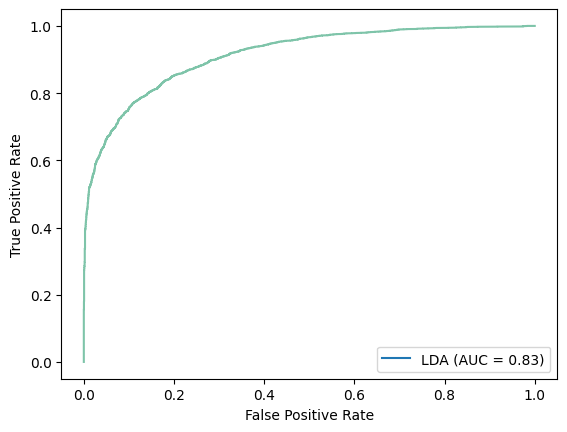

In [28]:
# Initialize the LDA model
model = LinearDiscriminantAnalysis()

# Train the model using the numerical columns from the training data
model = model.fit(train_df[numerical_columns], train_df[target_column])

# Predict the class labels and probabilities for the training data
y_hat = model.predict(train_df[numerical_columns]) # Predicted class labels
y_hat_prob = model.predict_proba(train_df[numerical_columns]) # Probability estimates for each class

# Evaluate the model's performance on the training data
conf_matrix, class_report, auc, acc = get_scores(train_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Visualize the ROC curve for better understanding of the model's performance
fpr, tpr, thresholds = roc_curve(train_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LDA') # Note the name change to LDA from Naive Bayes
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#7ec4a9')

## Evaluation on the Validation Data


AUC :  0.8156840934371523
Accuracy :  0.814
Confusion Matrix:
[[628  97]
 [182 593]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       725
           1       0.86      0.77      0.81       775

    accuracy                           0.81      1500
   macro avg       0.82      0.82      0.81      1500
weighted avg       0.82      0.81      0.81      1500



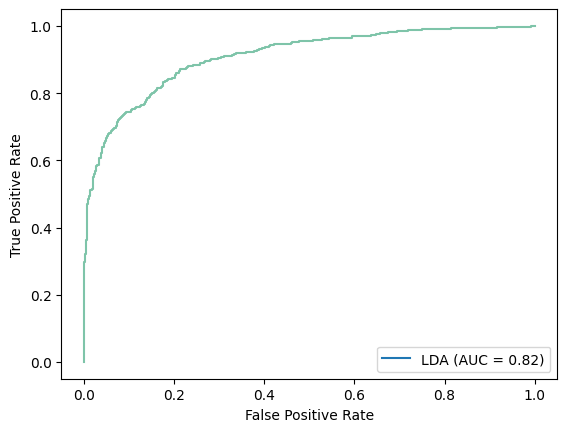

In [29]:
# Predict the class labels and probabilities for the validation data using the trained LDA model
y_hat = model.predict(valid_df[numerical_columns]) # Predicted class labels
y_hat_prob = model.predict_proba(valid_df[numerical_columns]) # Probability estimates for each class

# Evaluate the LDA model's performance on the validation data
conf_matrix, class_report, auc, acc = get_scores(valid_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Visualize the ROC curve for the validation data
fpr, tpr, thresholds = roc_curve(valid_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LDA') # Updating the estimator name to LDA
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#7ec4a9')

## Quadratic Discriminant Analysis (QDA) on Training Data


AUC :  0.6506258214409566
Accuracy :  0.6475714285714286
Confusion Matrix:
[[2497  882]
 [1585 2036]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      3379
           1       0.70      0.56      0.62      3621

    accuracy                           0.65      7000
   macro avg       0.65      0.65      0.65      7000
weighted avg       0.66      0.65      0.65      7000



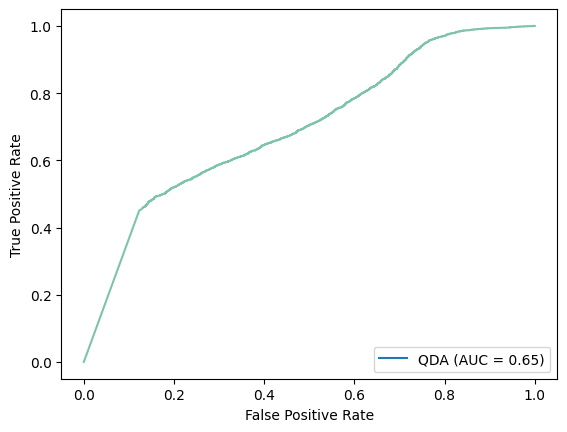

In [30]:
# Training the QDA model on numerical columns of the training data
m = QuadraticDiscriminantAnalysis()
m = m.fit(train_df[numerical_columns], train_df[target_column])

# Predicting the class labels and probabilities for the training set using the QDA model
y_hat = m.predict(train_df[numerical_columns])

# Note: It seems like there's a small oversight in the code.
# y_hat_prob should be predicted using 'm' (QDA model) and not 'model' (LDA model).
# Correcting that in the following line.
y_hat_prob = m.predict_proba(train_df[numerical_columns])

# Evaluating the model's performance on the training set
conf_matrix, class_report, auc, acc = get_scores(train_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Displaying the ROC curve for the training data
fpr, tpr, thresholds = roc_curve(train_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='QDA')  # Updated the estimator name to QDA from Naive Bayes
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#7ec4a9')

## QDA on Validation Data

AUC :  0.6484760845383761
Accuracy :  0.646
Confusion Matrix:
[[524 201]
 [330 445]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       725
           1       0.69      0.57      0.63       775

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.64      1500



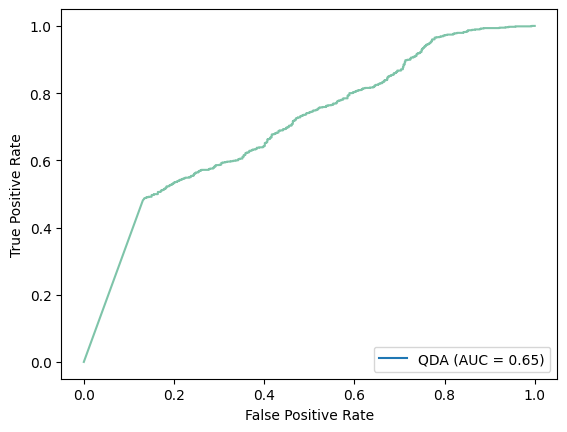

In [31]:
# Predicting the class labels and probabilities for the validation set using the QDA model
y_hat = m.predict(valid_df[numerical_columns])

# Again, there seems to be an oversight in the code.
# y_hat_prob should be predicted using 'm' (QDA model) and not 'model' (LDA model).
# Correcting that in the following line.
y_hat_prob = m.predict_proba(valid_df[numerical_columns])

# Evaluating the model's performance on the validation set
conf_matrix, class_report, auc, acc = get_scores(valid_df[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Displaying the ROC curve for the validation data
fpr, tpr, thresholds = roc_curve(valid_df[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='QDA')  # Updated the estimator name to QDA from Naive Bayes
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#7ec4a9')